In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [1]:
from sklearn.cluster import KMeans

In [ ]:
# Distance measurement

In [4]:
x1= np.array([0,1])
x2= np.array([2,0])
print(np.sqrt(((x1-x2)**2).sum()))

2.23606797749979


In [5]:
from sklearn.datasets import load_wine

wine_dataset = load_wine()
wine = pd.DataFrame(wine_dataset.data,columns = wine_dataset.feature_names)

In [6]:
wine.shape

(178, 13)

In [7]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [58]:
wine.tail(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750.0
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630.0
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660.0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560.0


In [30]:
#wine.iloc[:,:3].head
wine.iloc[:,[0,5]].head()

,alcohol,total_phenols
0,14.23,2.80
1,13.20,2.65
2,13.16,2.80
3,14.37,3.85
4,13.24,2.80


In [11]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


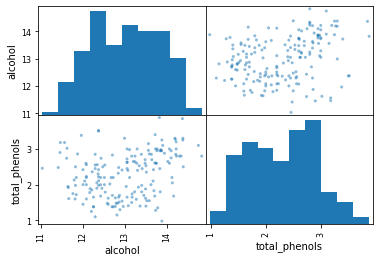

In [13]:
scatter_matrix(wine.iloc[:,[0,5]])
plt.show()

# Pre-processing: Standarization

In [14]:
x= wine[["alcohol","total_phenols"]]

In [15]:
from sklearn.preprocessing import StandardScaler

### Instantiate the scaller

In [16]:
scaler = StandardScaler()

### Compute the mean and std to be used later for scaling

In [18]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaler.mean_

array([13.00061798,  2.29511236])

In [20]:
scaler.scale_

array([0.80954291, 0.62409056])

In [21]:
x_scaled= scaler.transform(x)

In [22]:
x_scaled.mean(axis = 0)

array([ 7.84141790e-15, -1.95536471e-16])

In [23]:
x_scaled.std(axis = 0)

array([1., 1.])

# K-means modeling

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)

kmeans.fit(x_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Prediction

In [25]:
y_pred = kmeans.predict(x_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1], dtype=int32)

In [26]:
kmeans.cluster_centers_

array([[-1.06183503,  0.08414606],
       [ 0.92017418,  0.87087204],
       [ 0.05253603, -1.14020926]])

## Plot the scaled data

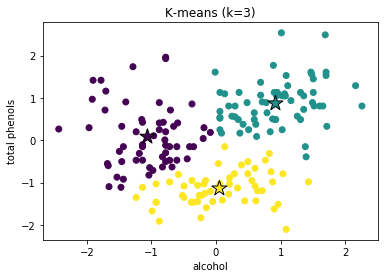

In [27]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c = y_pred)

## identifying the centroid

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker ="*",s=250,c=[0,1,2],edgecolor = "k")
plt.xlabel("alcohol")
plt.ylabel("total phenols")
plt.title("K-means (k=3)")
plt.show()

In [59]:
x_new = np.array([[15,1.5]])
x_new_scaled = scaler.transform(x_new)
kmeans.predict(x_new_scaled)

array([2], dtype=int32)